In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path = "다운로드.jpg"

image = np.array(Image.open(path).convert("RGB").resize((256, 256)))
image_r, image_g, image_b = image[:,:,0], image[:,:,1], image[:,:,2]
image_s = np.stack([image_r, image_g, image_b], -1)
image_r, image_g, image_b = np.diag(image_r), np.diag(image_g), np.diag(image_b)

# image = plt.imshow(image)
# plt.show()

# image_s = plt.imshow(image_s)
# plt.show()

In [22]:
import cv2
import math
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
from torchvision import transforms
import random

video_legal_dir = r"D:\Video-Dataset\2022-NSR-3m-재분류\agree"
video_illegal_dir = r"D:\Video-Dataset\2022-NSR-3m-재분류\non-agree"
# video_illegal_dir = r"C:\Users\VIP444\Documents\Github\VideoClassification\runs\2022-07-11-192908-Densenet201\error_non_to_ag"

transform = transforms.Compose([
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

def extract_diagnoal_matrix(dir_path : str):
    video_paths = glob.glob(dir_path + "\*.mp4")
    random.shuffle(video_paths)
    video_paths = video_paths[:5]
    video_diagonals = []
    video_names = []

    pre_ht = []

    for video_path in tqdm(video_paths, total=len(video_paths), desc="Extract Features"):
        vidcap = cv2.VideoCapture(video_path)
        vid_total_frames_num = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
        vid_frame_per_s = int(vidcap.get(cv2.CAP_PROP_FPS))
        video_name = video_path.split("\\")[-1]

        sections, retstep = np.linspace(1, vid_total_frames_num, 256, retstep=True)
        sections = list(map(math.floor, sections))
        frame_diagonals = []
        frames = []

        while(vidcap.isOpened()):
            ret, frame = vidcap.read()
            
            if not ret:
                break

            if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) in sections:
                # frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
                frame = cv2.resize(frame, (256, 256))

                if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) == 1:
                    pre_frame = frame
                    continue
                
                if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) == sections[1]:
                    frames = abs(pre_frame - frame)
                else:
                    frames += abs(pre_frame - frame)
                pre_frame = frame

                # frame_ht = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
                # frame_gray_ht = cv2.calcHist(frame_ht, [0], None, [256], [0, 255])
                # frame_r_ht = cv2.calcHist(frame, [0], None, [256], [0, 255])
                # frame_g_ht = cv2.calcHist(frame, [1], None, [256], [0, 255])
                # frame_b_ht = cv2.calcHist(frame, [2], None, [256], [0, 255])

                # if int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)) == 1:
                #     pre_frame_r_ht = frame_r_ht
                #     pre_frame_g_ht = frame_g_ht
                #     pre_frame_b_ht = frame_b_ht
                #     continue

                # center 122 ~ 134
                # frame_r, frame_g, frame_b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
                # frame_r, frame_g, frame_b = np.diag(frame_r), np.diag(frame_g), np.diag(frame_b)
                # frame_r.flags.writeable, frame_g.flags.writeable, frame_b.flags.writeable = True, True, True
                
                # for i in range(121, 134):
                #     frame_r[i] = np.mean(frame[:,:,0][i])
                #     frame_g[i] = np.mean(frame[:,:,1][i])
                #     frame_b[i] = np.mean(frame[:,:,2][i])

                # frame_diagonal = np.stack([frame_r, frame_g, frame_b], -1)
                # frame_diagonal = np.stack([frame_r_ht, frame_g_ht, frame_b_ht], -1)
                # frame_diagonal = np.stack([abs(pre_frame_r_ht-frame_r_ht), abs(pre_frame_g_ht-frame_g_ht), abs(pre_frame_b_ht-frame_b_ht)], -1).squeeze(1)
                # pre_frame_r_ht, pre_frame_g_ht, pre_frame_b_ht = frame_r_ht, frame_g_ht, frame_b_ht
                # frame_diagonal = np.expand_dims(frame_diagonal, 1)
                # frame_diagonal = np.expand_dims(frame_gray_ht, 1)
                # frame_diagonals.append(frame_diagonal)
                # frame_diagonals.append(frames)

        vidcap.release()
        # video_diagonal = np.concatenate(frame_diagonals, axis=1)
        video_diagonal = frames.astype(float)
        video_diagonal /= 256
        video_diagonals.append(video_diagonal)
        video_names.append(video_name)
    
    return video_names, video_diagonals

legal_diagonals = extract_diagnoal_matrix(video_legal_dir)
illegal_diagonals = extract_diagnoal_matrix(video_illegal_dir)

Extract Features: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


In [23]:
diagonals_legal = []
diagonals_illegal = []
legal_names = []
illegal_names = []

for name, diagonal_legal in zip(legal_diagonals[0], legal_diagonals[1]):
    legal_names.append(name)
    diagonals_legal.append(diagonal_legal)

for name, diagonal_illegal in zip(illegal_diagonals[0], illegal_diagonals[1]):
    illegal_names.append(name)
    diagonals_illegal.append(diagonal_illegal)

804-001.mp4


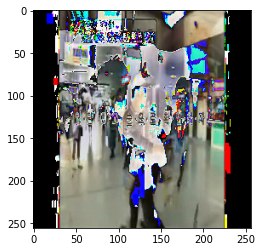

182-002.mp4


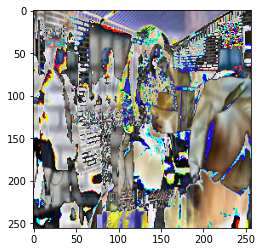

285-004_non_to_ag.mp4


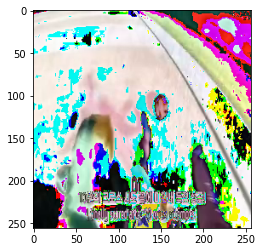

825-002.mp4


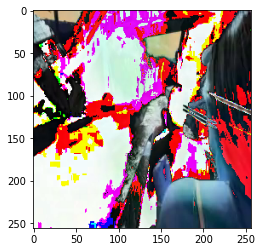

1026-003.mp4


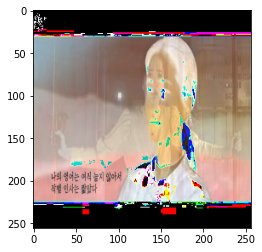

In [26]:
for n, i in zip(legal_names, diagonals_legal):
    print(n)
    # i = i.astype(int)
    plt.imshow(i)
    plt.show()

In [ ]:
from PIL import Image

save_dir = r"D:\Video-Dataset\2022-NSR-3m-재분류\non-agree-image"

def image_save(images):
    for name, image in tqdm(zip(images[0], images[1]), total=len(images[0]), desc="Image save"):
        name = name.split(".")[0] + ".png"
        image = Image.fromarray(image)
        image.save(f"{save_dir}\{name}")

# image_save(legal_diagonals)
image_save(illegal_diagonals)

In [ ]:
path = r"C:\Users\VIP444\Documents\Github\VideoClassification\62f9a36ea3cea.jpg"

image = cv2.imread(path)
a = cv2.calcHist(image, [1], None, [256], [0, 256])
print(a)